# Dirac notation

Execute the following cells if you have problems running the code:

In [ ]:
pip install wget

In [ ]:
pip install opencv-python

## Basis expansions

Paul Dirac's formalism for linear algebra is ingeniously tailored for the operations we perform in quantum theory, but may easily be applied to other problems. In this notebook we will use it to represent a photo of Dirac as a kid. By *photo*, we mean a grid of pixels assigned a numerical value given by the amount of light which at one point in time passed through a given regioun of the lens of the camera which was directed at the young Dirac.

Let's begin by loading the image, which we shall refer to as $\vert \Psi \rangle$:

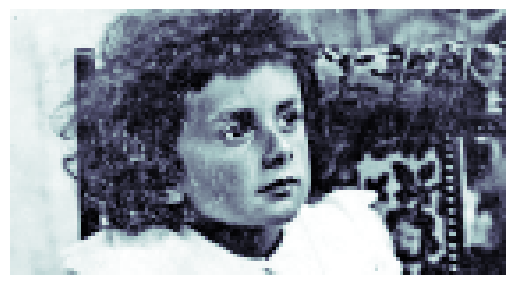

In [32]:
import cv2, wget
import numpy as np
import matplotlib.pyplot as plt

dirac = 'https://1.bp.blogspot.com/-K4SHfqTCFH4/X6DuOKtxxkI/AAAAAAAANEo/RKb9SSr7NRsAggS8oWh3zRqRvwh1x7qUgCNcBGAsYHQ/w1200-h630-p-k-no-nu/dirac%2Bpaul%2Bchildhood.jpg'
filename = wget.download(dirac)
dirac = cv2.imread(filename)
dirac = cv2.resize(dirac, [140,75], interpolation = cv2.INTER_AREA)
psi = np.sum(dirac, axis = 2) #flatten out the color-channels

plt.figure()
plt.imshow(psi, cmap = "bone")
plt.axis("off")
plt.show()


Nx, Ny = psi.shape #get the shape of the image


The photo resides in a *vectorspace* $\mathcal{V}$ which may be spanned by various *bases*. While the grid of pixels may seem like a natural choice of basis, it is actually seldomly the most compact and therefore typically *not* used on computers.

We shall construct an *orthogonal* and *normalized* basis, which we shall refer to as $\{ \varphi_n \}$, spanning the space we are after. That the basis functions are mutually orthogonal and normalized means that

$$
\langle \varphi_m \vert \varphi_n \rangle = \delta_{m,n},
$$

where

$$
\delta_{mn} =
    \begin{cases}
            1, &         \text{if } m=n,\\
            0, &         \text{if } m\neq n.
    \end{cases}
$$

When these two conditions are satisfied, we conveniently mash these two words into one by stating that the basis is *orthonormal*. 

**Note** that this is a bit circular. A set of functions $\{ \varphi_n \}$ must meet three criterions for it to be a basis for a vectorspace $\mathcal{V}$: 
1. Any vector $\vert a \rangle \in \mathcal{V}$ can be expressed $\vert a \rangle = \sum_{n} \vert \varphi_n \rangle c_n$. 
2. The set $\{ \varphi_n \}$ is *linearly independent*, meaning that no vector in the set can be expressed as a linear combination of the remaining vectors.
3. The basis must satisfy the completeness criterion, given by $\sum_{n} \vert \varphi_n \rangle \langle \varphi_n \vert = \mathbb{1}$.

Inspired by <a href="https://www.youtube.com/watch?v=spUNpyF58BY&ab_channel=3Blue1Brown">Fourier-series</a>, we shall construct a basis from simply cosine-functions:

$$
\varphi_{n}(x) = \cos{(n \pi x)} \hspace{1cm} x \in (0,1).
$$

We may extend this to two dimensions by means of a product:

$$
\varphi_{n_x, n_y}(x, y) := \varphi_{n_x}(x) \varphi_{n_y}(y) = \cos{(n_x \pi x)}\cos{(n_y \pi y)} .
$$

You would probably like to actually see these functions, so let's construct the first few in a grid:

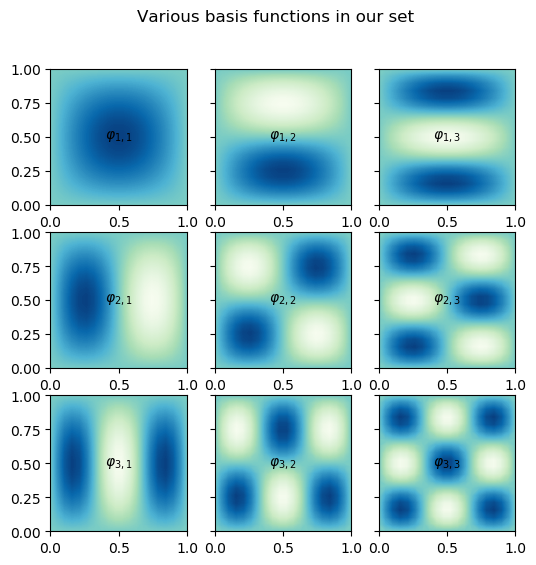

In [33]:
varphi = lambda x, y, nx, ny : np.sin(np.pi*x*nx)*np.sin(np.pi*y*ny)


fig, axs = plt.subplots(3, 3, figsize=(6, 6), sharey=True)

fig.suptitle('Various basis functions in our set')

t = np.linspace(0,1,20)
for nx in range(1,4):
    for ny in range(1,4):
        axs[nx-1,ny-1].contourf(t,t, varphi(t[None,:], t[:, None], nx,ny), cmap = "GnBu", levels = np.linspace(-1,1,200))
        axs[nx-1,ny-1].text(.5,.5, "$\\varphi_{%i,%i}$" % (nx, ny), ha = "center", va = "center")

plt.show()

These are very different from the *pixel*-representation of the photo. Remember that the task we want to undertake is essentially to represent 

$$
\vert \Psi \rangle = \sum_{n_x} \sum_{n_y} \varphi_{n_x, n_y} c_n.
$$

You should take a moment to think about (or discuss with someone) what this really means. 

```{admonition} Discussion
- What does the above mathematical expression mean in plain words. Explain it to somebody.
- For a set of linearly dependent vectors, how can you tell which ones to remove in order to get an linearly independent set?
- How is it a problem having a linear dependence in the first place?
```

## Inner product space

We have not yet defined the inner product for our vector space $\mathcal{V}$. Recall that the inner product should be a mapping from two vectors in $\mathcal{V}$ to a *scalar*:

$$
\langle \varphi_m \vert \varphi_n \rangle \in \mathbb{C}.
$$

For quantum mechanical systems you will typically use 

$$
\langle \varphi_m \vert \varphi_n \rangle = \int_{\mathbb{R}^2} \big{(} \varphi_m(x,y)^*\varphi_n(x,y) \big{)}dxdy )
$$

In our case, we shall for simplicity rather use a numerical equivalent for real numbers:

In [34]:
def inner(psi_n, psi_m):
    """
    Our simple inner product
    """
    return np.sum(psi_n*psi_m)

By defining our inner product, our vector space $\mathcal{V}$ has achieved the status of an *inner product space*, and we can check if our set of functions $\{ \varphi_n \}$ meets the criterions (1-3) for being a basis of $\mathcal{V}$:

In [35]:
t = np.linspace(0,1,100)


for nx in range(1,4):
    for ny in range(1,4):
        phi_m = varphi(t[None,:], t[:, None], nx,ny)
        for nx_ in range(1,4):
            for ny_ in range(1,4):
                phi_n = varphi(t[None,:], t[:, None], nx_,ny_)
                print("< phi_{%i %i} | phi_{%i %i} >" % (nx,ny,nx_, ny_), " = %.3f" % inner(phi_m, phi_n) )


< phi_{1 1} | phi_{1 1} >  = 2450.250
< phi_{1 1} | phi_{1 2} >  = 0.000
< phi_{1 1} | phi_{1 3} >  = 0.000
< phi_{1 1} | phi_{2 1} >  = -0.000
< phi_{1 1} | phi_{2 2} >  = 0.000
< phi_{1 1} | phi_{2 3} >  = -0.000
< phi_{1 1} | phi_{3 1} >  = -0.000
< phi_{1 1} | phi_{3 2} >  = 0.000
< phi_{1 1} | phi_{3 3} >  = 0.000
< phi_{1 2} | phi_{1 1} >  = 0.000
< phi_{1 2} | phi_{1 2} >  = 2450.250
< phi_{1 2} | phi_{1 3} >  = 0.000
< phi_{1 2} | phi_{2 1} >  = 0.000
< phi_{1 2} | phi_{2 2} >  = -0.000
< phi_{1 2} | phi_{2 3} >  = 0.000
< phi_{1 2} | phi_{3 1} >  = -0.000
< phi_{1 2} | phi_{3 2} >  = -0.000
< phi_{1 2} | phi_{3 3} >  = 0.000
< phi_{1 3} | phi_{1 1} >  = 0.000
< phi_{1 3} | phi_{1 2} >  = 0.000
< phi_{1 3} | phi_{1 3} >  = 2450.250
< phi_{1 3} | phi_{2 1} >  = -0.000
< phi_{1 3} | phi_{2 2} >  = 0.000
< phi_{1 3} | phi_{2 3} >  = -0.000
< phi_{1 3} | phi_{3 1} >  = 0.000
< phi_{1 3} | phi_{3 2} >  = 0.000
< phi_{1 3} | phi_{3 3} >  = -0.000
< phi_{2 1} | phi_{1 1} >  = -0.000
<

Numerically we may consider anything below $10^{-14}$ to be zero, but is this set *orthonormal*? The output above gives you this information, so see if you can figure it out before we move on.

## A truncated basis

We cannot construct the complete basis in the approach we are following here, but we can construct a basis which is quite large. From the above discussion, it was clear that our set was orthogonal, but not normalized. Let's fix this by constructing a truncated set of basis functions in a list, whereby each function is normalized separately:

In [41]:
basis = []

# We should use a grid equal to the image dimensions for subsequent calculations
Nx, Ny = psi.shape
x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)

nc = 50
for nx in range(1,nc):
    for ny in range(1,nc):
        phi = varphi(x[:, None], y[None, :], nx,ny)
        phi_normalized = phi*inner(phi, phi)**-.5 #normalize
        print("< phi_{%i %i} | phi_{%i %i} >" %(nx,ny,nx,ny), " = %.2f" % inner(phi_normalized,phi_normalized))
        basis.append(phi_normalized)

< phi_{1 1} | phi_{1 1} >  = 1.00
< phi_{1 2} | phi_{1 2} >  = 1.00
< phi_{1 3} | phi_{1 3} >  = 1.00
< phi_{1 4} | phi_{1 4} >  = 1.00
< phi_{1 5} | phi_{1 5} >  = 1.00
< phi_{1 6} | phi_{1 6} >  = 1.00
< phi_{1 7} | phi_{1 7} >  = 1.00
< phi_{1 8} | phi_{1 8} >  = 1.00
< phi_{1 9} | phi_{1 9} >  = 1.00
< phi_{1 10} | phi_{1 10} >  = 1.00
< phi_{1 11} | phi_{1 11} >  = 1.00
< phi_{1 12} | phi_{1 12} >  = 1.00
< phi_{1 13} | phi_{1 13} >  = 1.00
< phi_{1 14} | phi_{1 14} >  = 1.00
< phi_{1 15} | phi_{1 15} >  = 1.00
< phi_{1 16} | phi_{1 16} >  = 1.00
< phi_{1 17} | phi_{1 17} >  = 1.00
< phi_{1 18} | phi_{1 18} >  = 1.00
< phi_{1 19} | phi_{1 19} >  = 1.00
< phi_{1 20} | phi_{1 20} >  = 1.00
< phi_{1 21} | phi_{1 21} >  = 1.00
< phi_{1 22} | phi_{1 22} >  = 1.00
< phi_{1 23} | phi_{1 23} >  = 1.00
< phi_{1 24} | phi_{1 24} >  = 1.00
< phi_{1 25} | phi_{1 25} >  = 1.00
< phi_{1 26} | phi_{1 26} >  = 1.00
< phi_{1 27} | phi_{1 27} >  = 1.00
< phi_{1 28} | phi_{1 28} >  = 1.00
< phi_{1 2

< phi_{11 2} | phi_{11 2} >  = 1.00
< phi_{11 3} | phi_{11 3} >  = 1.00
< phi_{11 4} | phi_{11 4} >  = 1.00
< phi_{11 5} | phi_{11 5} >  = 1.00
< phi_{11 6} | phi_{11 6} >  = 1.00
< phi_{11 7} | phi_{11 7} >  = 1.00
< phi_{11 8} | phi_{11 8} >  = 1.00
< phi_{11 9} | phi_{11 9} >  = 1.00
< phi_{11 10} | phi_{11 10} >  = 1.00
< phi_{11 11} | phi_{11 11} >  = 1.00
< phi_{11 12} | phi_{11 12} >  = 1.00
< phi_{11 13} | phi_{11 13} >  = 1.00
< phi_{11 14} | phi_{11 14} >  = 1.00
< phi_{11 15} | phi_{11 15} >  = 1.00
< phi_{11 16} | phi_{11 16} >  = 1.00
< phi_{11 17} | phi_{11 17} >  = 1.00
< phi_{11 18} | phi_{11 18} >  = 1.00
< phi_{11 19} | phi_{11 19} >  = 1.00
< phi_{11 20} | phi_{11 20} >  = 1.00
< phi_{11 21} | phi_{11 21} >  = 1.00
< phi_{11 22} | phi_{11 22} >  = 1.00
< phi_{11 23} | phi_{11 23} >  = 1.00
< phi_{11 24} | phi_{11 24} >  = 1.00
< phi_{11 25} | phi_{11 25} >  = 1.00
< phi_{11 26} | phi_{11 26} >  = 1.00
< phi_{11 27} | phi_{11 27} >  = 1.00
< phi_{11 28} | phi_{11 28} 

< phi_{21 45} | phi_{21 45} >  = 1.00
< phi_{21 46} | phi_{21 46} >  = 1.00
< phi_{21 47} | phi_{21 47} >  = 1.00
< phi_{21 48} | phi_{21 48} >  = 1.00
< phi_{21 49} | phi_{21 49} >  = 1.00
< phi_{22 1} | phi_{22 1} >  = 1.00
< phi_{22 2} | phi_{22 2} >  = 1.00
< phi_{22 3} | phi_{22 3} >  = 1.00
< phi_{22 4} | phi_{22 4} >  = 1.00
< phi_{22 5} | phi_{22 5} >  = 1.00
< phi_{22 6} | phi_{22 6} >  = 1.00
< phi_{22 7} | phi_{22 7} >  = 1.00
< phi_{22 8} | phi_{22 8} >  = 1.00
< phi_{22 9} | phi_{22 9} >  = 1.00
< phi_{22 10} | phi_{22 10} >  = 1.00
< phi_{22 11} | phi_{22 11} >  = 1.00
< phi_{22 12} | phi_{22 12} >  = 1.00
< phi_{22 13} | phi_{22 13} >  = 1.00
< phi_{22 14} | phi_{22 14} >  = 1.00
< phi_{22 15} | phi_{22 15} >  = 1.00
< phi_{22 16} | phi_{22 16} >  = 1.00
< phi_{22 17} | phi_{22 17} >  = 1.00
< phi_{22 18} | phi_{22 18} >  = 1.00
< phi_{22 19} | phi_{22 19} >  = 1.00
< phi_{22 20} | phi_{22 20} >  = 1.00
< phi_{22 21} | phi_{22 21} >  = 1.00
< phi_{22 22} | phi_{22 22} > 

< phi_{33 36} | phi_{33 36} >  = 1.00
< phi_{33 37} | phi_{33 37} >  = 1.00
< phi_{33 38} | phi_{33 38} >  = 1.00
< phi_{33 39} | phi_{33 39} >  = 1.00
< phi_{33 40} | phi_{33 40} >  = 1.00
< phi_{33 41} | phi_{33 41} >  = 1.00
< phi_{33 42} | phi_{33 42} >  = 1.00
< phi_{33 43} | phi_{33 43} >  = 1.00
< phi_{33 44} | phi_{33 44} >  = 1.00
< phi_{33 45} | phi_{33 45} >  = 1.00
< phi_{33 46} | phi_{33 46} >  = 1.00
< phi_{33 47} | phi_{33 47} >  = 1.00
< phi_{33 48} | phi_{33 48} >  = 1.00
< phi_{33 49} | phi_{33 49} >  = 1.00
< phi_{34 1} | phi_{34 1} >  = 1.00
< phi_{34 2} | phi_{34 2} >  = 1.00
< phi_{34 3} | phi_{34 3} >  = 1.00
< phi_{34 4} | phi_{34 4} >  = 1.00
< phi_{34 5} | phi_{34 5} >  = 1.00
< phi_{34 6} | phi_{34 6} >  = 1.00
< phi_{34 7} | phi_{34 7} >  = 1.00
< phi_{34 8} | phi_{34 8} >  = 1.00
< phi_{34 9} | phi_{34 9} >  = 1.00
< phi_{34 10} | phi_{34 10} >  = 1.00
< phi_{34 11} | phi_{34 11} >  = 1.00
< phi_{34 12} | phi_{34 12} >  = 1.00
< phi_{34 13} | phi_{34 13} > 

< phi_{42 28} | phi_{42 28} >  = 1.00
< phi_{42 29} | phi_{42 29} >  = 1.00
< phi_{42 30} | phi_{42 30} >  = 1.00
< phi_{42 31} | phi_{42 31} >  = 1.00
< phi_{42 32} | phi_{42 32} >  = 1.00
< phi_{42 33} | phi_{42 33} >  = 1.00
< phi_{42 34} | phi_{42 34} >  = 1.00
< phi_{42 35} | phi_{42 35} >  = 1.00
< phi_{42 36} | phi_{42 36} >  = 1.00
< phi_{42 37} | phi_{42 37} >  = 1.00
< phi_{42 38} | phi_{42 38} >  = 1.00
< phi_{42 39} | phi_{42 39} >  = 1.00
< phi_{42 40} | phi_{42 40} >  = 1.00
< phi_{42 41} | phi_{42 41} >  = 1.00
< phi_{42 42} | phi_{42 42} >  = 1.00
< phi_{42 43} | phi_{42 43} >  = 1.00
< phi_{42 44} | phi_{42 44} >  = 1.00
< phi_{42 45} | phi_{42 45} >  = 1.00
< phi_{42 46} | phi_{42 46} >  = 1.00
< phi_{42 47} | phi_{42 47} >  = 1.00
< phi_{42 48} | phi_{42 48} >  = 1.00
< phi_{42 49} | phi_{42 49} >  = 1.00
< phi_{43 1} | phi_{43 1} >  = 1.00
< phi_{43 2} | phi_{43 2} >  = 1.00
< phi_{43 3} | phi_{43 3} >  = 1.00
< phi_{43 4} | phi_{43 4} >  = 1.00
< phi_{43 5} | phi_{

You should now have a orthonormal set of functions spanning at least a *subspace* of $\mathcal{V}$. The final criterion of completeness is a bit cumbersome to test for, so we leave it out for now. Suffice to say, what we will do in the following is to approximate $\vert \Psi \rangle$ in a truncated basis such that

$$
\vert \Psi \rangle \approx \sum_{n_x}^{N_x} \sum_{n_y}^{N_y} \varphi_{n_x, n_y} c_n.
$$

```{admonition} Discussion
- Mathematically speaking, does a truncated basis still formally qualify as a *basis*?
- What is the vector space spanned by a truncated basis?
```

## Projection

Given a orthonormal trucanted basis for $\mathcal{V}$, we can determine the expansion coefficients $c$ by means of *projection*. In other words, we shall determine the components of $\vert \Psi \rangle$ in the space spanned by $\{ \varphi_n \}$:

$$
c_m = \langle \varphi_m \vert \Psi \rangle.
$$

With our numerical setup, this is now done in a (somewhat slow) breeze:

In [42]:
c = np.zeros(len(basis))

for m in range(len(basis)):
    phi_m = basis[m]
    c[m] = inner(phi_m, psi)
    


The coefficients by themselves are not of much interest, but you may have a look if you wish:

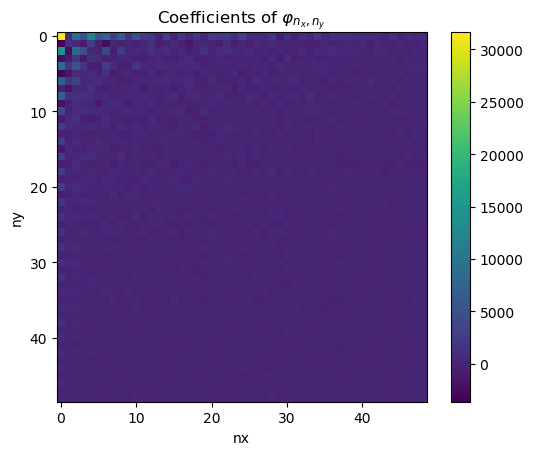

In [43]:
plt.figure()
plt.title("Coefficients of $\\varphi_{n_x,n_y}$")

plt.imshow(c.reshape(nc-1,nc-1))
plt.colorbar()
plt.xlabel("nx")
plt.ylabel("ny")
plt.show()

The linear combination

$$
\sum_{n_x}^{N_x} \sum_{n_y}^{N_y} \varphi_{n_x, n_y} c_n \approx \vert \Psi \rangle
$$

should however now be quite interesting. If we have done everything correctly, we expect this linear combination to be an approximate representation of the photo of the young Dirac. Let's have a look, and notice that there is no direct reference to $\vert \Psi \rangle$ in the following code:

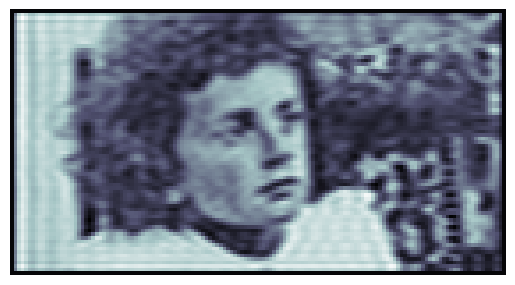

In [44]:
z = 0
for m in range(len(basis)):
    phi_m = basis[m]
    z += c[m]*phi_m

plt.figure()
plt.imshow(z, cmap = "bone")
plt.axis("off")
plt.show()

For a side-by-side comparison, we include

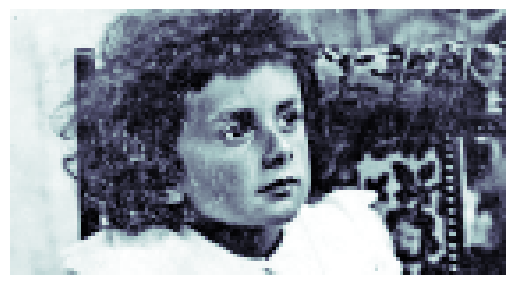

In [45]:
plt.figure()
plt.imshow(psi, cmap = "bone")
plt.axis("off")
plt.show()

This is an *approximate representation*, but we managed to capture quite a lot of what goes on in the picture. This demonstration furthermore illuminates some concepts that is central in our quest for understanding the quantum molecular world using numerics. In the analytical case, the choice of basis is arbitrary as long as it is complete. When truncating, however, we would like to know how to refine our basis towards the exact result. 

If you would like to pursue this latter part in more detail, you should have a look on he completeness relation. Can you measure how well our truncated set span $\mathcal{V}$?